## Regresión lineal con descenso de gradiente

Se implementará el algorítmo de optimización **descenso de gradiente** para calcular los parámetros de regresión a un conjunto de datos pequeño, con una variable independiente para una visualización y entendimiento óptimos.

In [1]:
# Librerias básicas
import numpy as np
import matplotlib.pyplot as plt

## Recolección de datos
Los datos han sido generados de manera que exista una relación lineal entre $ x $ y la variable dependiente $ y $, lo que facilitará la construcción de un modelo lineal entre ambas.


In [2]:
# Generamos 100 valores de x entre 0 y 10
x = np.linspace(0, 10, 100)

# y = 3*x + 7 + algo de ruido para que no sea perfecto
y = 3 * x + 7 + np.random.normal(0, 1, 100)

x, y

(array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677,  6.8

## Visualización de datos
Usando matplot lib visualizamos los datos en el plano.

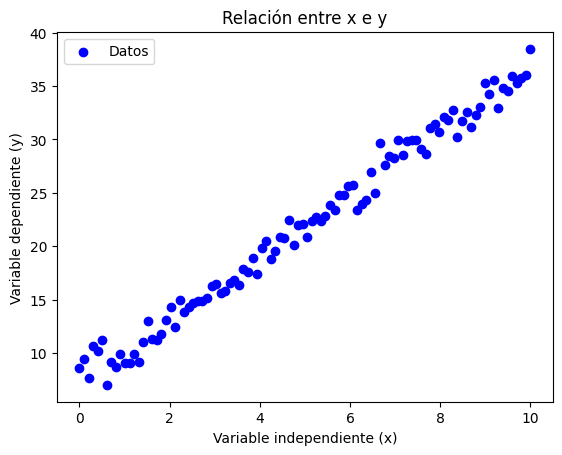

In [3]:
plt.scatter(x, y, color = 'blue', label = 'Datos')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Variable dependiente (y)')
plt.title('Relación entre x e y')
plt.legend()
plt.show()

## Datos iniciales necesarios

Se tiene la matriz $X$ con el bias agregado:
$$
X=\begin{pmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_d^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_d^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_1^{(n)} & x_2^{(n)} & \cdots & x_d^{(n)}
    \end{pmatrix}
$$
Y $n$ siendo el número de datos, mientras que $d$ el número de variables independientes.


In [4]:
bias = np.ones_like(x)
X = np.column_stack((bias, x))
n = len(x)
d = 1

## Visualización con predicciones aleatorias
Se inicializa el **vector de parámetros** $\theta$ con componentes $\theta_0$ y $\theta_1$ aleatorios y se visualiza la recta obtenida con parametros aleatorios, teniendo $$y_{pred}=\hat{y}=X\theta$$

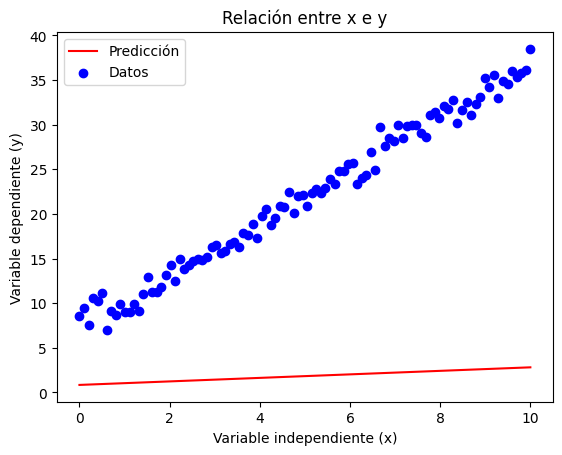

In [5]:
# Parámetros aleatorios
theta = np.random.rand(d+1)

# Predicciones con parametros aleatorios
y_pred = X @ theta

# Visualización
plt.plot(x, y_pred, color='red', label='Predicción')

plt.scatter(x, y, color = 'blue', label = 'Datos')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Variable dependiente (y)')
plt.title('Relación entre x e y')
plt.legend()
plt.show()

Estos son parámetros para ajustar el algorítmo

In [6]:
alpha = 0.01
max_iter = 1000
epsilon = 2.220446049250313e-16

In [7]:
# Inicializamos theta (d+1,)
theta = np.random.rand(d+1)

for epoch in range(max_iter):
    y_pred = X @ theta                   # Predicciones (n,)
    error = y_pred - y                  # Error (n,)

    gradiente = (X.T @ error) / n       # Gradiente vectorizado (d+1,)

    theta_previo = theta.copy()
    theta = theta - alpha * gradiente

    costo = np.linalg.norm(theta - theta_previo)
    if costo < epsilon:
        break

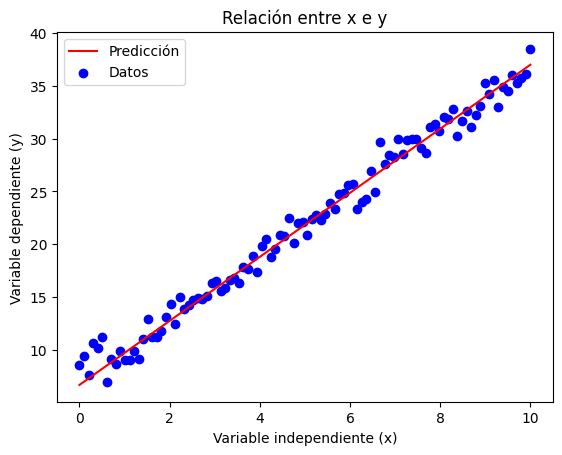

In [8]:
# Predicciones con parametros ajustados
y_pred = X @ theta

# Visualización
plt.plot(x, y_pred, color='red', label='Predicción')

plt.scatter(x, y, color = 'blue', label = 'Datos')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Variable dependiente (y)')
plt.title('Relación entre x e y')
plt.legend()
plt.show()